In [65]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import re

In [66]:
# Load the emotions DataFrame with 'feeling' and 'emotion' columns
colNames = ['feeling','emotion']
emotions = pd.read_csv(r"C:\Users\Kishore\197\MachineLearning\files_fonts\Emotions_detection_based_on_reviews\train.txt",sep = ";",header=None,names=colNames)

- We have 16000 rows of data
- Columns have been named appropriately as feeling and emotion
- We would consider feeling as input feature and emotion as taget column

In [67]:
emotions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   feeling  16000 non-null  object
 1   emotion  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [68]:
emotions['emotion'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emotion, dtype: int64

- Check different emotions counts
- We see that the dataset is imbalanced with more number of joy and sadness compared to other emotions

In [69]:
emotions['feeling'][emotions['emotion']=='sadness']

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
5        ive been feeling a little burdened lately wasn...
10       i feel like i have to make the suffering i m s...
13                      i feel low energy i m just thirsty
                               ...                        
15988              i feel pathetic because im still single
15991    i have wanted to perhaps convey my feelings of...
15995    i just had a very brief time in the beanbag an...
15996    i am now turning and i feel pathetic that i am...
15999    i know a lot but i feel so stupid because i ca...
Name: feeling, Length: 4666, dtype: object

In [70]:
emotions['emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

# Let us see what words stand out for each emotion by creating a word cloud:

In [71]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS


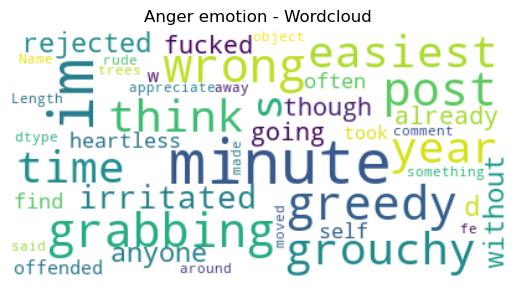

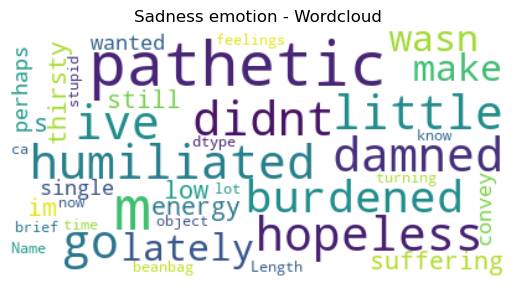

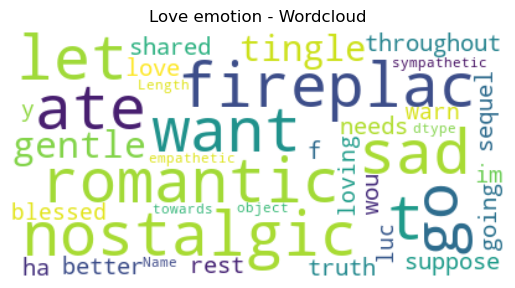

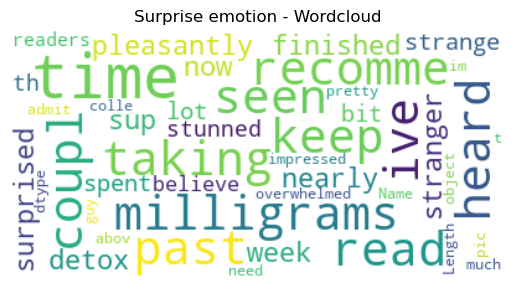

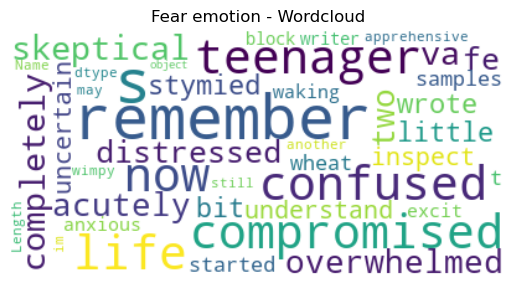

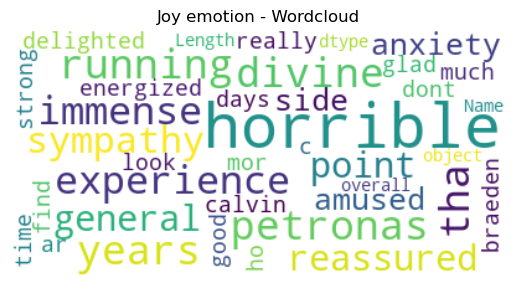

In [72]:
 
# Wordcloud with sadness emotion
anger_emotion = emotions['feeling'][emotions['emotion']=='anger']
stop_words = ['feeling','feel']+list(STOPWORDS)
anger_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(anger_emotion))
plt.figure()
plt.title("Anger emotion - Wordcloud")
plt.imshow(anger_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with anger emotion
sadness_emotion = emotions['feeling'][emotions['emotion']=='sadness']
stop_words = ['feeling','feel']+list(STOPWORDS)
sadness_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(sadness_emotion))
plt.figure()
plt.title("Sadness emotion - Wordcloud")
plt.imshow(sadness_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Wordcloud with love emotion
love_emotion = emotions['feeling'][emotions['emotion']=='love']
stop_words = ['feeling','feel']+list(STOPWORDS)
love_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(love_emotion))
plt.figure()
plt.title("Love emotion - Wordcloud")
plt.imshow(love_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Wordcloud with surprise emotion
surprise_emotion = emotions['feeling'][emotions['emotion']=='surprise']
stop_words = ['feeling','feel']+list(STOPWORDS)
surprise_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(surprise_emotion))
plt.figure()
plt.title("Surprise emotion - Wordcloud")
plt.imshow(surprise_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Wordcloud with fear emotion
fear_emotion = emotions['feeling'][emotions['emotion']=='fear']
stop_words = ['feeling','feel']+list(STOPWORDS)
fear_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(fear_emotion))
plt.figure()
plt.title("Fear emotion - Wordcloud")
plt.imshow(fear_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with joy emotion
joy_emotion = emotions['feeling'][emotions['emotion']=='joy']
stop_words = ['feeling','feel']+list(STOPWORDS)
joy_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(joy_emotion))
plt.figure()
plt.title("Joy emotion - Wordcloud")
plt.imshow(joy_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()




# We will have to convert the Text data to structured numerical data
- Machine only understands numerical data so first this data needs to be converted
- Before we convert to numerical data there are several preprocessing steps that we can use as data cleaning steps

# Few Text preprocessing steps:
- Convert to uniform case
- Remove html tags (not needed here)
- Remove urls (not needed here)
- Remove Newline (not needed here)
- Remove Special characters (non needed here)
- Remove Stopwords
- Stemming / Lemmetization (we will use Lemmetization here)

In [73]:
# Find below Recipe of Custom Functions for each step

# Covert to Lower case
def lowerCase(text):
    #return text.lower()
    return text.str.lower()

# Remove html tags
def removeHtmlTags(text):
    return text.apply(lambda x:re.sub(r'<.*?>',"",x))

# Remove Urls
def removeUrls(text):
    return text.apply(lambda x:re.sub(r'https?://\S+|www\.S\+',"",x))

# Remove NewLine 
def handleNewLine(text):
    return text.apply(lambda x:re.sub(r'\n',' ',x))

# Remove Special Characters
def removeSpecialChars(text):
    return text.apply(lambda x:re.sub(r'[^0-1a-zA-Z]',' ',x))

# Remove Stopwords
def removeStopwords(text):
    import nltk
    from nltk.corpus import stopwords
    nltk.download('stopwords')
    stop_words = set(['feeling','feel']+list(stopwords.words('english')))

    return text.apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Stemming
def stemTokens(text):
    from nltk.stem import SnowballStemmer
    snowballStemmer = SnowballStemmer('english')
    
    return text.apply(lambda x: ' '.join([snowballStemmer.stem(word) for word in x.split() if word != " "]))

# Lemmetization
def lemTokens(text):
    nltk.download('wordnet')
    nltk.download('omw-1.4')
    from nltk.stem import WordNetLemmatizer
    lem = WordNetLemmatizer()
 
    return text.apply(lambda x: ' '.join([lem.lemmatize(word) for word in x.split() if word != " "]))


In [74]:
# We will be creating a Pipeline for various Preprocessing steps
#  To Display Pipeline
from sklearn import set_config
set_config(display='diagram')

In [75]:
# Importing libraries needed
import nltk
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer

In [76]:
# Create pipe# Create pipeline
text_prep_pipeline = Pipeline([
    ('lowerCase', FunctionTransformer(lowerCase)),
    ('removeHtmlTags', FunctionTransformer(removeHtmlTags)),
    ('removeUrls', FunctionTransformer(removeUrls)),
    ('handleNewLine', FunctionTransformer(handleNewLine)),
    ('removeSpecialChars', FunctionTransformer(removeSpecialChars)),
    ('removeStopwords', FunctionTransformer(removeStopwords)),
    ('lemTokens', FunctionTransformer(lemTokens)),
])


In [77]:
display(text_prep_pipeline)

Pipeline(steps=[('lowerCase',
                 FunctionTransformer(func=<function lowerCase at 0x00000264911C2DC0>)),
                ('removeHtmlTags',
                 FunctionTransformer(func=<function removeHtmlTags at 0x00000264911C2F70>)),
                ('removeUrls',
                 FunctionTransformer(func=<function removeUrls at 0x00000264911C2E50>)),
                ('handleNewLine',
                 FunctionTransformer(func=<function handleNewLine at 0x00000264910D0040>)),
                ('removeSpecialChars',
                 FunctionTransformer(func=<function removeSpecialChars at 0x00000264910D00D0>)),
                ('removeStopwords',
                 FunctionTransformer(func=<function removeStopwords at 0x00000264910D0160>)),
                ('lemTokens',
                 FunctionTransformer(func=<function lemTokens at 0x00000264FF567AF0>))])

In [78]:
emotions['feeling']

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
15995    i just had a very brief time in the beanbag an...
15996    i am now turning and i feel pathetic that i am...
15997                       i feel strong and good overall
15998    i feel like this was such a rude comment and i...
15999    i know a lot but i feel so stupid because i ca...
Name: feeling, Length: 16000, dtype: object

In [79]:
# Recognize predictor or Input and target or output features for Machine learning
X = emotions['feeling']
y = emotions['emotion']

In [80]:
# Perform pre-processing on input feature by applying the pipeline 
X_prep = text_prep_pipeline.fit_transform(X)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kishore\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kishore\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Kishore\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [81]:
data = {'feeling':X_prep,'emotion':y}

In [108]:
emotions = pd.concat(data,axis=1)
emotions

,feeling,emotion
0,didnt humiliated,sadness
1,go hopeless damned hopeful around someone care...,sadness
2,im grabbing minute post greedy wrong,anger
3,ever nostalgic fireplace know still property,love
4,grouchy,anger
...,...,...
15995,brief time beanbag said anna like beaten,sadness
15996,turning pathetic still waiting table subbing t...,sadness
15997,strong good overall,joy
15998,like rude comment im glad,anger


In [109]:
# Step 2: Train a Word2Vec model
documents = [feeling.split() for feeling in emotions['feeling']]
word2vec_model = Word2Vec(sentences=documents, vector_size=100, window=5, min_count=1, workers=4)

In [110]:
# If we want to look at words created
# word2vec_model.wv.key_to_index

In [112]:
len(word2vec_model.wv.__getitem__('family'))

100

In [115]:
# Step 3: Calculate TF-IDF weights and transform the documents
tfidf_vectorizer = TfidfVectorizer()


tfidf_matrix = tfidf_vectorizer.fit_transform(emotions['feeling'])



In [116]:
# Step 4: Multiply Word2Vec embeddings with TF-IDF weights
tfidf_word2vec_vectors = []

for document in documents:
    feature_vector = np.zeros(100)  # Assuming Word2Vec embeddings are of size 100
    
    for token in document:
        if token in word2vec_model.wv and token in tfidf_vectorizer.vocabulary_:
            tfidf_score = tfidf_matrix[documents.index(document), tfidf_vectorizer.vocabulary_[token]]
            word_vector = word2vec_model.wv[token]
            feature_vector += (word_vector * tfidf_score)
    
    tfidf_word2vec_vectors.append(feature_vector)


In [117]:
# Normalize the vectors
tfidf_word2vec_vectors = normalize(tfidf_word2vec_vectors)

In [118]:
# Convert the tfidf_word2vec_vectors list to a DataFrame
tfidf_word2vec_df = pd.DataFrame(tfidf_word2vec_vectors)

In [119]:
# Concatenate the emotion column with the tfidf_word2vec_df DataFrame
result_df = pd.concat([emotions['emotion'], tfidf_word2vec_df], axis=1)

In [120]:
result_df

,emotion,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,sadness,-0.040116,0.120340,0.003834,-0.009776,0.029285,-0.188783,0.073482,0.247091,-0.103612,...,0.136543,0.048357,-0.025800,0.037610,0.238377,0.102364,0.069392,-0.120730,0.008412,0.006309
1,sadness,-0.040552,0.118794,0.004356,-0.009917,0.031481,-0.188666,0.072505,0.244079,-0.106455,...,0.134568,0.050828,-0.026929,0.039376,0.235957,0.099590,0.068971,-0.124278,0.011657,0.006095
2,anger,-0.039254,0.119266,0.007277,-0.008005,0.031293,-0.190034,0.069902,0.243833,-0.107098,...,0.135234,0.050493,-0.026228,0.035987,0.233265,0.100556,0.069327,-0.122841,0.010826,0.005580
3,love,-0.040697,0.118822,0.006420,-0.008272,0.033807,-0.186579,0.071647,0.247216,-0.105989,...,0.136450,0.050009,-0.025194,0.038732,0.235397,0.098242,0.071408,-0.122227,0.008018,0.004908
4,anger,-0.030446,0.107539,0.006698,-0.010581,0.031370,-0.191482,0.065850,0.240237,-0.099042,...,0.134584,0.057720,-0.028986,0.032190,0.236428,0.102627,0.070161,-0.119053,0.015084,-0.001322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,sadness,-0.038912,0.120280,0.004682,-0.008054,0.031452,-0.189634,0.072628,0.243090,-0.107064,...,0.135784,0.053717,-0.024756,0.036999,0.236263,0.100533,0.069549,-0.123004,0.011289,0.005576
15996,sadness,-0.038711,0.119446,0.005520,-0.009391,0.029209,-0.188733,0.069518,0.247086,-0.105667,...,0.135903,0.050533,-0.023406,0.039676,0.236023,0.100717,0.068083,-0.121047,0.010309,0.004827
15997,joy,-0.040429,0.119564,0.006429,-0.008514,0.030687,-0.188716,0.070308,0.245550,-0.103619,...,0.137671,0.049556,-0.025955,0.036758,0.234054,0.100921,0.069359,-0.122332,0.011482,0.003290
15998,anger,-0.040060,0.119940,0.006799,-0.008031,0.030207,-0.191339,0.073203,0.245598,-0.103691,...,0.136869,0.051715,-0.024040,0.037475,0.234281,0.099659,0.068701,-0.123400,0.009305,0.005905


In [121]:
X = result_df.iloc[:,1:]
y = result_df['emotion']

In [122]:
X

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.040116,0.120340,0.003834,-0.009776,0.029285,-0.188783,0.073482,0.247091,-0.103612,-0.049082,...,0.136543,0.048357,-0.025800,0.037610,0.238377,0.102364,0.069392,-0.120730,0.008412,0.006309
1,-0.040552,0.118794,0.004356,-0.009917,0.031481,-0.188666,0.072505,0.244079,-0.106455,-0.050053,...,0.134568,0.050828,-0.026929,0.039376,0.235957,0.099590,0.068971,-0.124278,0.011657,0.006095
2,-0.039254,0.119266,0.007277,-0.008005,0.031293,-0.190034,0.069902,0.243833,-0.107098,-0.050456,...,0.135234,0.050493,-0.026228,0.035987,0.233265,0.100556,0.069327,-0.122841,0.010826,0.005580
3,-0.040697,0.118822,0.006420,-0.008272,0.033807,-0.186579,0.071647,0.247216,-0.105989,-0.049468,...,0.136450,0.050009,-0.025194,0.038732,0.235397,0.098242,0.071408,-0.122227,0.008018,0.004908
4,-0.030446,0.107539,0.006698,-0.010581,0.031370,-0.191482,0.065850,0.240237,-0.099042,-0.050169,...,0.134584,0.057720,-0.028986,0.032190,0.236428,0.102627,0.070161,-0.119053,0.015084,-0.001322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,-0.038912,0.120280,0.004682,-0.008054,0.031452,-0.189634,0.072628,0.243090,-0.107064,-0.048523,...,0.135784,0.053717,-0.024756,0.036999,0.236263,0.100533,0.069549,-0.123004,0.011289,0.005576
15996,-0.038711,0.119446,0.005520,-0.009391,0.029209,-0.188733,0.069518,0.247086,-0.105667,-0.052064,...,0.135903,0.050533,-0.023406,0.039676,0.236023,0.100717,0.068083,-0.121047,0.010309,0.004827
15997,-0.040429,0.119564,0.006429,-0.008514,0.030687,-0.188716,0.070308,0.245550,-0.103619,-0.047856,...,0.137671,0.049556,-0.025955,0.036758,0.234054,0.100921,0.069359,-0.122332,0.011482,0.003290
15998,-0.040060,0.119940,0.006799,-0.008031,0.030207,-0.191339,0.073203,0.245598,-0.103691,-0.051143,...,0.136869,0.051715,-0.024040,0.037475,0.234281,0.099659,0.068701,-0.123400,0.009305,0.005905


In [123]:
y

0        sadness
1        sadness
2          anger
3           love
4          anger
          ...   
15995    sadness
15996    sadness
15997        joy
15998      anger
15999    sadness
Name: emotion, Length: 16000, dtype: object

In [124]:
#  split X & y in to xTrain, xTest, yTrain, yTest
# if we pass 2 arrays we get train & test of the first array, then train & test of the second array
# random_state parameter in test_train_split is simillar to random_seed parameter in random function
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,y,
                                                test_size= 0.32,
                                                random_state= 22
                                               )

In [125]:
# check if input variable train and test has same size as target variable
# the rows have to be same for us to proceed
xTrain.shape, xTest.shape, len(yTrain), len(yTest)

((10880, 100), (5120, 100), 10880, 5120)

# Support Vector Machine

In [126]:
# Build and train an SVM model
svm_model = SVC()
svm_model.fit(xTrain, yTrain)


SVC()

In [127]:
# Make predictions on the test set
yTestpred = svm_model.predict(xTest)


In [128]:
# Calculate accuracy
accuracy = acs(yTest, yTestpred)
print("Accuracy:", accuracy)


Accuracy: 0.3412109375


In [129]:
yTrainpred = svm_model.predict(xTrain)

In [130]:
accuracy = acs(yTrain, yTrainpred)
print("Accuracy:", accuracy)


Accuracy: 0.3323529411764706


# Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier


In [132]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(xTrain, yTrain)


RandomForestClassifier(random_state=42)

In [133]:
y_train_pred_rf = rf_model.predict(xTrain)
y_pred_rf = rf_model.predict(xTest)


In [134]:
accuracy = acs(yTrain, y_train_pred_rf)
print("Accuracy:", accuracy)


Accuracy: 0.9985294117647059


In [135]:
accuracy = acs(yTest, y_pred_rf)
print("Accuracy:", accuracy)


Accuracy: 0.4080078125
